In [0]:
# load saved network
# do inference

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2

# This file contains all the main external libs we'll use
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
%config InlineBackend.figure_format = 'retina'

In [0]:
from pathlib import Path

In [0]:
PATH = Path("/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/")
sz=224

In [6]:
os.listdir(PATH)

['test2', 'test2.zip', 'train', 'models', 'valid', 'tmp']

In [7]:
list((PATH / 'models').iterdir())

[PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/models/224_epoch9.h5'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/models/224_epoch19.h5')]

# model

In [0]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [0]:
learn.load('224_epoch19')

# prediction

In [15]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(273, 2)

In [16]:
log_preds[:10]

array([[-0.00015, -8.81903],
       [-0.01963, -3.94049],
       [-4.00259, -0.01844],
       [-0.37483, -1.16285],
       [-0.00225, -6.09686],
       [-0.01063, -4.54901],
       [-0.00157, -6.46047],
       [-0.00021, -8.47651],
       [-1.85063, -0.17095],
       [-0.00083, -7.09366]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(polonez)

# inference

In [0]:
# !ls /content/drive/old_polish_cars/test2

In [11]:
list((PATH / 'test2').iterdir())

[PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch4.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/polonez2.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/polonez1.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch1.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch2.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch3.jpg')]

In [0]:
# needs arch, sz, learn
trn_tfms, val_tfms = tfms_from_model(arch, sz)
learn.precompute = False

def inference(image_path):
    # fname is Path()
    

    img_np = open_image(image_path)
    img = PIL.Image.open(image_path)

    im = val_tfms(img_np)
    log_preds = learn.predict_array(im[None]);
    
    preds = np.argmax(log_preds, axis=1); 
    pred = preds[0]

    probs = np.exp(log_preds[:,1]); 
    prob = probs[0]

    pred = np.argmax(log_preds); 
    
    
    class_name = data.classes[pred]; 
    
    return pred, class_name, prob, img
  
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])  

In [13]:
# test2_path = Path('/content/drive/old_polish_cars/test2')
test2_path = PATH / 'test2'
fns = list(test2_path.iterdir()); fns

[PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch4.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/polonez2.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/polonez1.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch1.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch2.jpg'),
 PosixPath('/content/data/old_polish_cars/old_polish_cars_two_classes_v2a-split/test2/maluch3.jpg')]

In [22]:
ims = []
titles = []

for fn in fns:
  pred, class_name, prob, img = inference(fn)
  print(f'{fn.stem}: prob={prob*100:0.3}% -> pred: ({pred}, {class_name})')
  ims.append(img)
  titles.append(f'prob={prob*100:0.3}% -> ({pred}, {class_name})')

maluch4: prob=3.01% -> pred: (0, maluch)
polonez2: prob=98.5% -> pred: (1, polonez)
polonez1: prob=79.6% -> pred: (1, polonez)
maluch1: prob=0.101% -> pred: (0, maluch)
maluch2: prob=0.1% -> pred: (0, maluch)
maluch3: prob=0.0567% -> pred: (0, maluch)


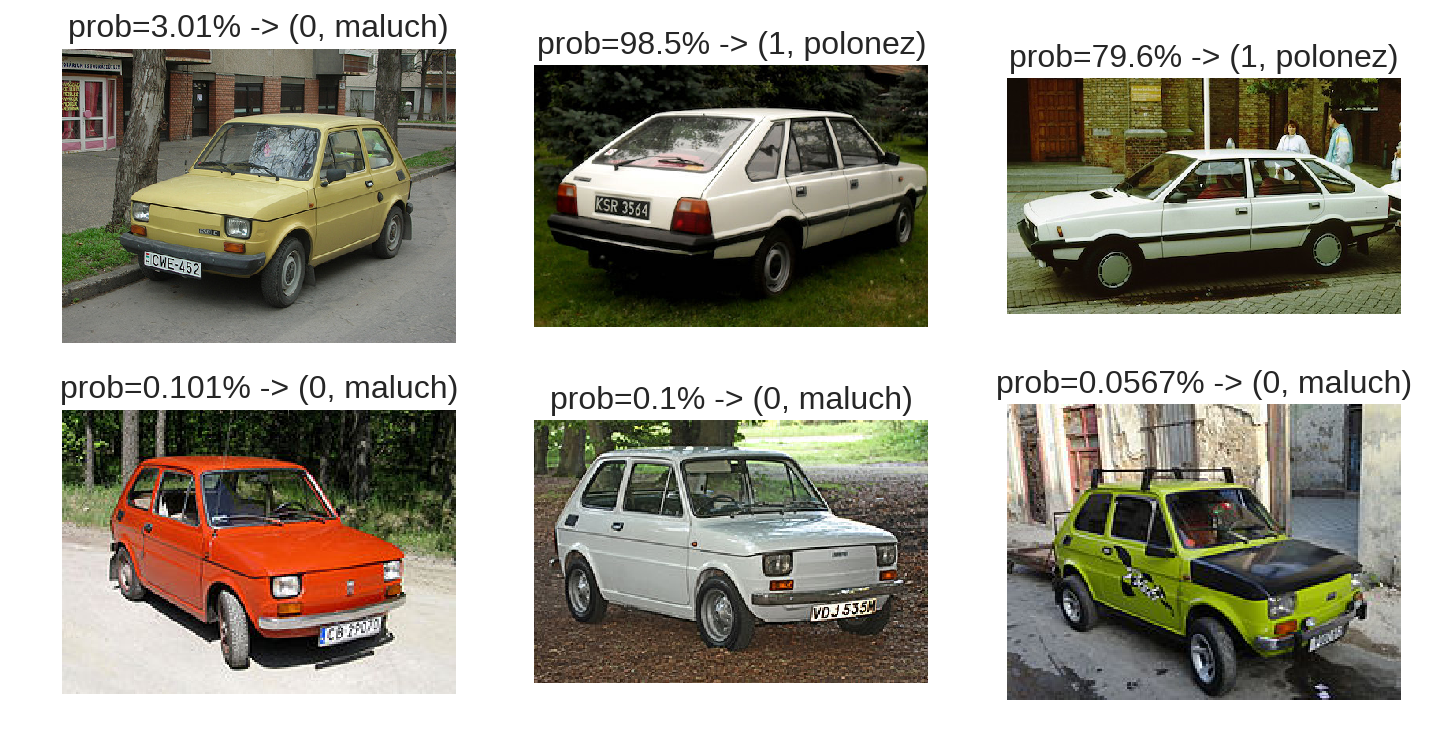

In [15]:
plots(ims, rows=2, titles=titles)